In [30]:
'''This program attempts to optimize a users portfolio using the Efficient Frontier'''

'This program attempts to optimize a users portfolio using the Efficient Frontier'

In [275]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [294]:
#Get the stock tickers in the portfolio 
assets = ['INDL','TMF','SMIN']

In [304]:
#Assign weights to the stocks. 
weights = np.array([0.33,0.33,0.34])

In [305]:
# Get the stock/ portfolio starting date
stockStartDate = '2019-05-01'
     

In [306]:
# Get the stocks' ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2024-06-17'

In [307]:
df = pd.DataFrame()
for stock in assets:
    df = yf.download(assets, start = stockStartDate,end='2024-06-14')['Adj Close']
     

[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed


In [308]:
df

Ticker,INDL,SMIN,TMF
Date,,,
2019-05-01,72.620766,37.300091,184.684769
2019-05-02,71.267532,36.957535,182.156082
2019-05-03,73.207497,37.442829,183.601089
2019-05-06,70.434776,37.090759,185.136353
2019-05-07,65.050201,35.844246,189.561569
...,...,...,...
2024-06-07,66.300003,76.669998,48.980000
2024-06-10,66.519997,77.500000,47.970001
2024-06-11,66.889999,77.910004,49.410000


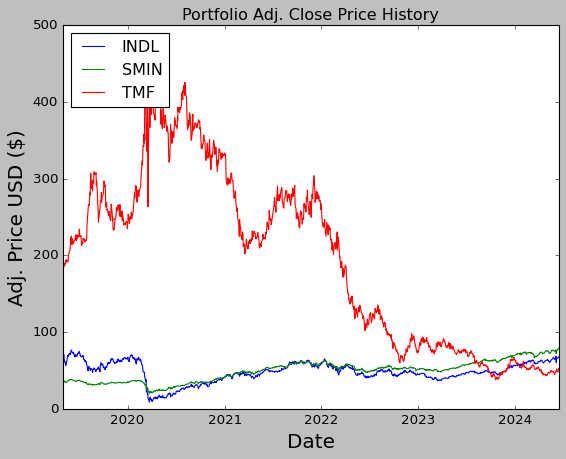

In [309]:
# Visually show the stock/ portfolio
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [310]:
# show the daily simple return
returns = df.pct_change()
returns

Ticker,INDL,SMIN,TMF
Date,,,
2019-05-01,NaN,NaN,NaN
2019-05-02,-0.018634,-0.009184,-0.013692
2019-05-03,0.027221,0.013131,0.007933
2019-05-06,-0.037875,-0.009403,0.008362
2019-05-07,-0.076448,-0.033607,0.023902
...,...,...,...
2024-06-07,0.022044,0.014825,-0.056262
2024-06-10,0.003318,0.010826,-0.020621
2024-06-11,0.005562,0.005290,0.030019


In [311]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

Ticker,INDL,SMIN,TMF
Ticker,,,
INDL,0.355189,0.131902,-0.042240
SMIN,0.131902,0.062449,-0.016958
TMF,-0.042240,-0.016958,0.273531


In [312]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.09254519694560573

In [313]:
# Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.3042124207615556

In [314]:
# Calculate the annual portfolio return
portfolio_simple_annual_return = np.sum(returns.mean()*weights)*252
portfolio_simple_annual_return
     

0.07939196853571641

In [315]:

# Sow the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance,2)*100)+'%'
percent_vola = str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfolio_simple_annual_return,2)*100)+'%'

print('Expected annual return: '+percent_ret)
print('Annual volatility/ risk: '+percent_vola)
print('Annual variance: '+percent_var)

Expected annual return: 8.0%
Annual volatility/ risk: 30.0%
Annual variance: 9.0%


In [31]:
pip install PyPortfolioOpt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [55]:
pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install --upgrade pyportfolioopt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [289]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [290]:
import matplotlib.pyplot as plt
plt.style.use('classic')  # Change 'seaborn-deep' to 'seaborn' or another available style
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [318]:

# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(0.1,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2] == 1)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('INDL', 0.1), ('SMIN', 0.8), ('TMF', 0.1)])
Expected annual return: 10.4%
Annual volatility: 25.3%
Sharpe Ratio: 0.33


(0.10403694778579588, 0.2525881324864598, 0.33270346852222266)

In [319]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value = 1000)

allocation,leftover = da.lp_portfolio()
print('Discrete allocation: ',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'INDL': 1, 'SMIN': 10, 'TMF': 2}
Funds remaining: $33.73


In [21]:
# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)


# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(stds, rets, c=sharpes, cmap='viridis_r', marker='.', label='Random Portfolios')
ax.scatter(std_tangent, ret_tangent, marker="*", color='r', s=100, label='Max Sharpe Ratio')
ax.set_title("Efficient Frontier with Random Portfolios")
ax.set_xlabel("Standard Deviation (Risk)")
ax.set_ylabel("Expected Return")
ax.legend()

# Adding a colorbar to show the Sharpe ratio
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Sharpe Ratio')

plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

NameError: name 'ax' is not defined